<a href="https://colab.research.google.com/github/mifm/examples/blob/master/edwin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
%%capture
!pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/edwin.git --upgrade

In [9]:
from ed_win.wind_farm_network import WindFarmNetwork, TwoStepHeuristicDriver, Refine, Repair
import numpy as np

I will repair T
I will refine T
    from_node  to_node  cable_length  cable_type    cable_cost
0           1        2   2000.000000           1  3.000000e+05
1           2        3   2000.000000           0  2.000000e+05
2           3        4   2000.000000           0  2.000000e+05
3           4        5   2000.000000           0  2.000000e+05
4           1        6   2061.227259           2  5.153068e+05
5           6        7   2000.000000           2  5.000000e+05
6           7        8   2000.000000           2  5.000000e+05
7           8        9   2000.000000           2  5.000000e+05
8           9       10   2000.000000           2  5.000000e+05
9          10       19   1918.391481           1  2.877587e+05
10         19       15   1304.281240           0  1.304281e+05
11         19       25   1658.369033           0  1.658369e+05
12         25       20   1479.500854           0  1.479501e+05
13         20       14    928.230659           0  9.282307e+04
14          1       11 

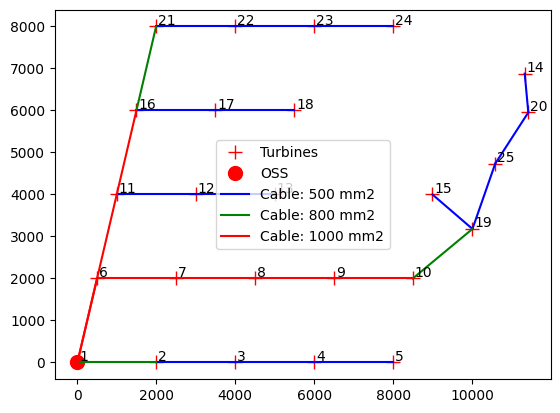

In [10]:
turbine_positions = np.asarray([[2000., 4000., 6000.,
                                  8000., 498.65600569, 2498.65600569, 4498.65600569,
                                  6498.65600569, 8498.65600569, 997.31201137, 2997.31201137,
                                  4997.31201137, 11336.25662483, 8997.31201137, 1495.96801706,
                                  3495.96801706, 5495.96801706, 10011.39514341, 11426.89538545,
                                  1994.62402275, 3994.62402275, 5994.62402275, 7994.62402275,
                                  10588.90471566],
                                [0., 0., 0.,
                                0., 2000., 2000., 2000.,
                                2000., 2000., 4000., 4000.,
                                4000., 6877.42528387, 4000., 6000.,
                                6000., 6000., 3179.76530545, 5953.63051694,
                                8000., 8000., 8000., 8000.,
                                4734.32972738]])
substation_positions = np.asarray([[0], [0]])
settings = {'option': 3,
            'Inters_const': True,
            'max_it': 20000,
            'repair': True}
cables = np.array([[500, 3, 100000], [800, 5, 150000], [1000, 10, 250000]])
wfn = WindFarmNetwork(turbine_positions=turbine_positions,
                      substation_positions=substation_positions,
                      drivers=[TwoStepHeuristicDriver(**settings), Refine(), Repair()],
                      sequence=[0, 2, 1],
                      cables=cables)
cost, state = wfn.design()
wfn.plot()
print(wfn.tree_as_table())
print(cost)

